In [157]:
#  load the libraries
import re # for the regular expressions
import nltk # for text manipulation
import string # for working with string and unicode objects, allows to create and customize our own string
import warnings # controls whether warnings are ignored, displayed, or turned into errors 
import numpy as np # allows to work with multi-dimensional arrays and matrices
import pandas as pd # exploring, modeling, cleaning, transforming, manipulating and analyzing data
import seaborn as sns # for drawing attractive and informative statistical graphics
import gensim # to handle large text collections using data streaming and incremental online algorithms
'''
    matplotlib for creating static, animated, and interactive visualizations
    matplotlib.pyplot: creates a figure, creates a plotting area in a figure, 
    plots some lines in a plotting area, decorates the plot with labels
'''
import matplotlib.pyplot as plt 
from nltk.stem.porter import *
from wordcloud import WordCloud # method for visually presenting text data. 
from tqdm import tqdm # to see progress of multipart processes as they happen
tqdm.pandas(desc='progress-bar')
from gensim.models.doc2vec import LabeledSentence # to encapsulate a text-example
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
%matplotlib inline

In [158]:
pd.set_option("display.max_colwidth", 200) # set the value of a single option
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [159]:
# load the train and test data
train_data = pd.read_csv('train_E6oV3lV.csv')
test_data = pd.read_csv('test_tweets_anuFYb8.csv')

In [160]:
# Let’s check out a few tweets.
train_data.head()

id  label  \
0   1      0   
1   2      0   
2   3      0   
3   4      0   
4   5      0   

                                                                                                                        tweet  
0                       @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run  
1  @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked  
2                                                                                                         bihday your majesty  
3                                      #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦    
4                                                                                      factsguide: society now    #motivation

In [161]:
# Let’s check out a few racist/sexist tweets.
train_data[train_data['label'] == 1].head()

id  label  \
13  14      1   
14  15      1   
17  18      1   
23  24      1   
34  35      1   

                                                                                                       tweet  
13                                @user #cnn calls #michigan middle school 'build the wall' chant '' #tcot    
14     no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins  
17                                                                                    retweet if you agree!   
23                                                           @user @user lumpy says i am a . prove it lumpy.  
34  it's unbelievable that in the 21st century we'd need something like this. again. #neverump  #xenophobia

In [162]:
# Let’s check out a few non racist/sexist tweets.
train_data[train_data['label'] == 0].head()

id  label  \
0   1      0   
1   2      0   
2   3      0   
3   4      0   
4   5      0   

                                                                                                                        tweet  
0                       @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run  
1  @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked  
2                                                                                                         bihday your majesty  
3                                      #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦    
4                                                                                      factsguide: society now    #motivation

In [163]:
# let's see the dimensions of the train and test data
print('Train Data: {}\nTest Data: {}'.format(train_data.shape, test_data.shape))

Train Data: (31962, 3)
Test Data: (17197, 2)


In [164]:
# Let’s see the label-distribution in the train dataset.
train_data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

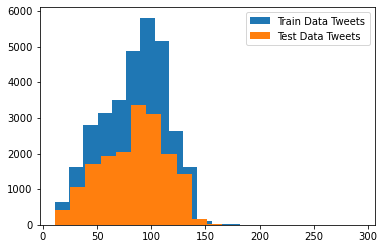

In [165]:
# Let's see the distribution of length of the tweets, in terms of words, in both train and test data.
length_train_data = train_data['tweet'].str.len()
length_test_data = test_data['tweet'].str.len()
plt.hist(length_train_data, bins=20, label='Train Data Tweets')
plt.hist(length_test_data, bins=20, label='Test Data Tweets')
plt.legend()
plt.show()

In [166]:
# Let's combine the datasets the train and test data before cleaning
combined_data = train_data.append(test_data, ignore_index=True)
combined_data.shape

(49159, 3)

In [167]:
# function remove unwanted text patterns from the tweets
def remove_unwanted_text(input_text, pattern):
    r = re.findall(pattern, input_text)
    for i in r:
        print ('Looking for "%s" in "%s" ->' % (pattern, input_text)),
        input_text = re.sub(i, '', input_text)
    return input_text

In [168]:
# Removing Twitter Handles (@user) and add a new column which will contain the cleaned and processed tweets
combined_data['clean_combined_data'] = np.vectorize(remove_unwanted_text)(combined_data['tweet'], '@[\w]*')

Looking for "@[\w]*" in " @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run" ->
Looking for "@[\w]*" in " @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run" ->
Looking for "@[\w]*" in "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked" ->
Looking for "@[\w]*" in "  thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked" ->
Looking for "@[\w]*" in " @user camping tomorrow @user @user @user @user @user @user @user dannyâ¦" ->
Looking for "@[\w]*" in "  camping tomorrow        dannyâ¦" ->
Looking for "@[\w]*" in "  camping tomorrow        dannyâ¦" ->
Looking for "@[\w]*" in "  camping tomorrow        dannyâ¦" ->
Looking for "@[\w]*" in "  camping tomorrow        dannyâ¦" ->
Looking for "@[\w]*" in "  camping tomorrow        dannyâ¦" ->
Looking for "@[\w]

Looking for "@[\w]*" in "put   on ur #summer #playlist #itunes  #spotify  @user " ->
Looking for "@[\w]*" in "@user  @user argentine women protest facebook's sexist censorship rules, eg 2.  #censorship #freethenipple " ->
Looking for "@[\w]*" in "   argentine women protest facebook's sexist censorship rules, eg 2.  #censorship #freethenipple " ->
Looking for "@[\w]*" in "@user what a #fail - this literally makes a fool of millions of americans who wanted an alternate voice  " ->
Looking for "@[\w]*" in "@user i cannot imagine being in the shoes of local law-enforcement and first responders.#orlando  prayers to all." ->
Looking for "@[\w]*" in " @user porn queen @user #sexysaturday  #smile #selfshot #boobs #rileysteele #sexy   #tits #seductive #home " ->
Looking for "@[\w]*" in "  porn queen  #sexysaturday  #smile #selfshot #boobs #rileysteele #sexy   #tits #seductive #home " ->
Looking for "@[\w]*" in "@user @user making the right decision for sure!! #bleedpurple #toocoldu   #gofrogs" 

Looking for "@[\w]*" in "@user @user you can't rationalize with people who clearly live in fear.  " ->
Looking for "@[\w]*" in "  you can't rationalize with people who clearly live in fear.  " ->
Looking for "@[\w]*" in " @user âdon't cry because it's over, smile because it happened.â #friend #friends #fun #funny #love #instagood #friendship #paâ¦" ->
Looking for "@[\w]*" in "oh yeah it's literally wverything when @user acknowledges your tweets.i feel impoant.ð¤ðð²   #bingebook " ->
Looking for "@[\w]*" in " @user boarding ze plane just now,   to see you too! bring on #rstn2016 @user @user @user @user" ->
Looking for "@[\w]*" in "  boarding ze plane just now,   to see you too! bring on #rstn2016    " ->
Looking for "@[\w]*" in "  boarding ze plane just now,   to see you too! bring on #rstn2016    " ->
Looking for "@[\w]*" in "  boarding ze plane just now,   to see you too! bring on #rstn2016    " ->
Looking for "@[\w]*" in "  boarding ze plane just now,   to see you too! br

Looking for "@[\w]*" in " @user #onthisday 1744 a young child died in #newcastle in tragic circumstances   #noheast #povey #socialhistory " ->
Looking for "@[\w]*" in " @user   #sunday all #smiles love and blessings to you from me ð#alyssag #workhardtoplayhard #smileâ¦ " ->
Looking for "@[\w]*" in " @user i can't wait for us to know on what gary michael walters and robe pattinson are working on.   #newproject " ->
Looking for "@[\w]*" in " @user smile with my   #dog. #dogsarejoy " ->
Looking for "@[\w]*" in "@user &lt;3 &lt;3 listen to my most beautiful best friend  @user  singing with her most amazing voice &lt;3 &lt;3 &lt;3 &lt;3 4 " ->
Looking for "@[\w]*" in " &lt;3 &lt;3 listen to my most beautiful best friend    singing with her most amazing voice &lt;3 &lt;3 &lt;3 &lt;3 4 " ->
Looking for "@[\w]*" in "  athena south woodford #suppolocal #business @user @user " ->
Looking for "@[\w]*" in "  athena south woodford #suppolocal #business   " ->
Looking for "@[\w]*" in "i know who

Looking for "@[\w]*" in "@user   ð to have a payslip of the lovely shop where i work #label for realâ¦ " ->
Looking for "@[\w]*" in "@user opps look like you're forgetting who your fav imitates to get success,you look like you don't kpop history, well like you fav  " ->
Looking for "@[\w]*" in "@user when your employees burn the pizza and sell it anyways yuck! #dissapointed   #burntpizza" ->
Looking for "@[\w]*" in " @user â   amazingxshow #ebony  " ->
Looking for "@[\w]*" in ". @user 100k s/likes in 52 mins....   " ->
Looking for "@[\w]*" in "well done @user - praying all goes well x  " ->
Looking for "@[\w]*" in " @user don't take a decision when u r angry. don't make a promise when u r happy. chances r, u will regret. #selfquote   #prâ¦" ->
Looking for "@[\w]*" in "@user not counted yet but can't wait to try  !" ->
Looking for "@[\w]*" in " @user what happend? " ->
Looking for "@[\w]*" in "@user @user @user @user @user @user   friday everyone!" ->
Looking for "@[\w]*" in "   

Looking for "@[\w]*" in "  @ sipiso-piso waterfall " ->
Looking for "@[\w]*" in "my photo's just been accepted by @user &amp; it's now for sale on @user #photography   " ->
Looking for "@[\w]*" in "my photo's just been accepted by  &amp; it's now for sale on  #photography   " ->
Looking for "@[\w]*" in "  #siilyfaces #family  #cousins #love #lasvegas #fremontstreet @ freemont st expeirence " ->
Looking for "@[\w]*" in " @user the teens in the book club are so excited to meet @user and talk about his incredible memoir, slugg! " ->
Looking for "@[\w]*" in "  the teens in the book club are so excited to meet  and talk about his incredible memoir, slugg! " ->
Looking for "@[\w]*" in "#switzerland makes me #smile ðð¨ð­ð #stmoritz #chanel   @ st. moritz (ch) " ->
Looking for "@[\w]*" in "1 week today until the amazing @user stas her uk tour @user   #detour" ->
Looking for "@[\w]*" in "1 week today until the amazing  stas her uk tour    #detour" ->
Looking for "@[\w]*" in "@user ...

Looking for "@[\w]*" in "we need more aicles like this from  on positive narratives against .    " ->
Looking for "@[\w]*" in "we need more aicles like this from  on positive narratives against .    " ->
Looking for "@[\w]*" in " @user ice bath, dinner and rest up for my trip to @user camp tomorrow. @user @user  " ->
Looking for "@[\w]*" in "  ice bath, dinner and rest up for my trip to  camp tomorrow.    " ->
Looking for "@[\w]*" in "  ice bath, dinner and rest up for my trip to  camp tomorrow.    " ->
Looking for "@[\w]*" in "  ice bath, dinner and rest up for my trip to  camp tomorrow.    " ->
Looking for "@[\w]*" in "@user and me?.... " ->
Looking for "@[\w]*" in "standing by my ideas about mullahs. kill all ignorant mullahs and pakistan would be prosperous again! @user  " ->
Looking for "@[\w]*" in " @user lol damn daniel, when you have a mans baby and you still ain't his number one  " ->
Looking for "@[\w]*" in "@user i think some of the #bernie folks instinctively understand she

Looking for "@[\w]*" in "@user - you're not romantic. #pain is somehow less of a life. #disability meaningless.   we are #alive. we are  . we are #whole." ->
Looking for "@[\w]*" in " @user omg this is definitely me #fairytail   #ayesir #me " ->
Looking for "@[\w]*" in "@user @user and so called "moderate muslims" just watch and say nothing.  " ->
Looking for "@[\w]*" in "  and so called "moderate muslims" just watch and say nothing.  " ->
Looking for "@[\w]*" in " @user @user @user gutless and spineless, which is the result of today's @user under the boehner-ryan-mcconnell leadâ¦" ->
Looking for "@[\w]*" in "    gutless and spineless, which is the result of today's  under the boehner-ryan-mcconnell leadâ¦" ->
Looking for "@[\w]*" in "    gutless and spineless, which is the result of today's  under the boehner-ryan-mcconnell leadâ¦" ->
Looking for "@[\w]*" in "    gutless and spineless, which is the result of today's  under the boehner-ryan-mcconnell leadâ¦" ->
Looking for "@[\w]*"

Looking for "@[\w]*" in " @user @user tysvm! "  #monday @user @user @user @user @user @user have aâ¦" ->
Looking for "@[\w]*" in "   tysvm! "  #monday       have aâ¦" ->
Looking for "@[\w]*" in "   tysvm! "  #monday       have aâ¦" ->
Looking for "@[\w]*" in "   tysvm! "  #monday       have aâ¦" ->
Looking for "@[\w]*" in "   tysvm! "  #monday       have aâ¦" ->
Looking for "@[\w]*" in "   tysvm! "  #monday       have aâ¦" ->
Looking for "@[\w]*" in "   tysvm! "  #monday       have aâ¦" ->
Looking for "@[\w]*" in "   tysvm! "  #monday       have aâ¦" ->
Looking for "@[\w]*" in " @user #mommy #anal   #blowjob #mature watch this clip at  " ->
Looking for "@[\w]*" in " @user   #humpday â¤ï¸ time is limited, don't miss out, ð866-820-9100 now to book w/ ivy! #natural #sexy #vegas #esco " ->
Looking for "@[\w]*" in "@user @user @user @user no follower here. not a @user fan. just fear @user more.  " ->
Looking for "@[\w]*" in "    no follower here. not a  fan. just fear  more.  "

Looking for "@[\w]*" in ".    yeah but we also found out that hulk doesn't have a 10" penis.  " ->
Looking for "@[\w]*" in ".    yeah but we also found out that hulk doesn't have a 10" penis.  " ->
Looking for "@[\w]*" in ".    yeah but we also found out that hulk doesn't have a 10" penis.  " ->
Looking for "@[\w]*" in "happy bihday to my beautiful mum shelley! off to see @user    #longleat #bihday #celebrations " ->
Looking for "@[\w]*" in "mondaymorning  #understanding#sharelove#peace @user" ->
Looking for "@[\w]*" in "@user @user my hea is broken for them all. such senseless cowardly act against innocent people just enjoying their free time.  " ->
Looking for "@[\w]*" in "  my hea is broken for them all. such senseless cowardly act against innocent people just enjoying their free time.  " ->
Looking for "@[\w]*" in "@user oh. my. god  " ->
Looking for "@[\w]*" in "@user of all the people in the world .you were the one person i thought would help  #youareaparenttoo  " ->
Looking for 

Looking for "@[\w]*" in "     thanks for the kiss off email with not so much as  sorry for the inconvenience.  " ->
Looking for "@[\w]*" in "     thanks for the kiss off email with not so much as  sorry for the inconvenience.  " ->
Looking for "@[\w]*" in "no more   poses anymore - loving barry rnâ¤ï¸ @user @user " ->
Looking for "@[\w]*" in "no more   poses anymore - loving barry rnâ¤ï¸   " ->
Looking for "@[\w]*" in " @user happy national best friend day!  @user mofknz    #nationalbestfriendday #bff #bfâ¦ " ->
Looking for "@[\w]*" in "  happy national best friend day!   mofknz    #nationalbestfriendday #bff #bfâ¦ " ->
Looking for "@[\w]*" in " @user look, xhaka and rodriquez both play the left side of the pitch, does this mean wenger will sign?   " ->
Looking for "@[\w]*" in "and it's complete. our entry for this year's #bhba2016 #fingerscrossed   @ graham westâ¦ " ->
Looking for "@[\w]*" in "going to see the drone thingy at @user tonight  " ->
Looking for "@[\w]*" in "@user i

Looking for "@[\w]*" in "@user @user @user you are also easily derailed.  " ->
Looking for "@[\w]*" in "   you are also easily derailed.  " ->
Looking for "@[\w]*" in "   you are also easily derailed.  " ->
Looking for "@[\w]*" in " @user   #grateful merci @user  #whyirunparis #whyirunlesabbesses #running music:ramones photos: romain bourven " ->
Looking for "@[\w]*" in "    #grateful merci   #whyirunparis #whyirunlesabbesses #running music:ramones photos: romain bourven " ->
Looking for "@[\w]*" in " @user my photo's just been accepted by @user &amp; it's now for sale on @user #photography   " ->
Looking for "@[\w]*" in "  my photo's just been accepted by  &amp; it's now for sale on  #photography   " ->
Looking for "@[\w]*" in "  my photo's just been accepted by  &amp; it's now for sale on  #photography   " ->
Looking for "@[\w]*" in "neeecxttt!!!   #stuttgaopen  @user ðð " ->
Looking for "@[\w]*" in "today yrkkh was super execelllent   #emotional hatsoff to u all guys #proudfan

Looking for "@[\w]*" in "  #motivation tip #5!  choose to be  ! #motivationmonday  #bloggercake     " ->
Looking for "@[\w]*" in "  #motivation tip #5!  choose to be  ! #motivationmonday  #bloggercake     " ->
Looking for "@[\w]*" in " @user wearing a jyh designed cnblue conce tee out for the 1st time ever #wave   but that reminds me of my lost one more fâ¦" ->
Looking for "@[\w]*" in "how is @user in the new independence day movie?... wasn't he killed off in the first film? #notcomplaining   #independenceday" ->
Looking for "@[\w]*" in "@user vk gave it his all in #wt20 &amp; #ipl2016, yet couldn't win it for his team   #meandmylife" ->
Looking for "@[\w]*" in "@user has a camel toe rather than a moose knuckle.   " ->
Looking for "@[\w]*" in " @user @user mainstream american news at its finest... they only tell u what they want u to know, they only show u what they wanâ¦" ->
Looking for "@[\w]*" in "   mainstream american news at its finest... they only tell u what they want u to kn

Looking for "@[\w]*" in " @user playing in  a closest to the pin challenge with lighted balls. playing with two scratch  players and holding my own on tâ¦" ->
Looking for "@[\w]*" in " @user @user has to get permission from her handlers before saying that. her donors from sharia law   " ->
Looking for "@[\w]*" in "   has to get permission from her handlers before saying that. her donors from sharia law   " ->
Looking for "@[\w]*" in "@user belles customised trunki and bits came today, extra fast just in time for ibiza. so cute ð #cute   " ->
Looking for "@[\w]*" in " @user #adv   #bihday #thalaivaaaaaa  thalaivaa vijay bdayspl week " ->
Looking for "@[\w]*" in "gearing up for @user worksop.   #shorebirds #what_will_it_take! @user " ->
Looking for "@[\w]*" in "gearing up for  worksop.   #shorebirds #what_will_it_take!  " ->
Looking for "@[\w]*" in " @user "he who avoids complaint invites happiness" - abu baker (al siddiq) we must stop complaining and begin looking at the câ¦" ->
Lo

Looking for "@[\w]*" in "  office prep for the upcoming    #goodmovies #ffmuc " ->
Looking for "@[\w]*" in "live life the way it comes!!!! #qotd #life #love   @ amsterdam, netherlands " ->
Looking for "@[\w]*" in "just 1 more sleep....... @user @user @user like a child on christmas eve!   " ->
Looking for "@[\w]*" in "just 1 more sleep.......    like a child on christmas eve!   " ->
Looking for "@[\w]*" in "just 1 more sleep.......    like a child on christmas eve!   " ->
Looking for "@[\w]*" in "@user will u charge 35% on yur own products made outside the usa? do tell!  #hypocrisy #trumplies #bigot #nazi " ->
Looking for "@[\w]*" in "i have no idea why i love him so much. it's so weird but @user really is my favorite person ever   " ->
Looking for "@[\w]*" in " @user kids being left in cars and left to get close to dangerous animals shows how irresponsible parents are with their kids noâ¦" ->
Looking for "@[\w]*" in " @user i rarely get to see my dad but the joy he had when i wished 

Looking for "@[\w]*" in "  look who visited qma today??!!   #theopen    " ->
Looking for "@[\w]*" in "@user what a fucking #joke ,..actually just   ,..time soon to #indict !" ->
Looking for "@[\w]*" in " @user check out the @user tour coming to a theatre near you!    " ->
Looking for "@[\w]*" in "  check out the  tour coming to a theatre near you!    " ->
Looking for "@[\w]*" in "that would be awesome!!!! whaaaaaa!! hahahaha   ðððð @user @user " ->
Looking for "@[\w]*" in "that would be awesome!!!! whaaaaaa!! hahahaha   ðððð   " ->
Looking for "@[\w]*" in "reunited with my harley!! @user #1200custom #2016 #harleydavidson #bike #openroad #windinmyface  " ->
Looking for "@[\w]*" in " @user   moments don't forget me. #difficult moments trust me. #quiet moments call me. every moment #bless me.ð¼ " ->
Looking for "@[\w]*" in " @user got tickets for the one and only legend that is @user ðð»ðð   @user #hello #allnightlong" ->
Looking for "@[\w]*" in "  got

Looking for "@[\w]*" in "1 week to go..........    @user " ->
Looking for "@[\w]*" in "coffee break! today we have a session with the one and only @user ð  #coffeebreak #london #newsongs   " ->
Looking for "@[\w]*" in " @user stay   stay #healthy " ->
Looking for "@[\w]*" in " @user happiness is finding daves killer bread at my local supermarket #daveskillerbread #yum #healthy   @user" ->
Looking for "@[\w]*" in "  happiness is finding daves killer bread at my local supermarket #daveskillerbread #yum #healthy   " ->
Looking for "@[\w]*" in "@user @user @user  such a bitter twisted man. at least we saved his children from him. perhaps that was the final straw.  " ->
Looking for "@[\w]*" in "    such a bitter twisted man. at least we saved his children from him. perhaps that was the final straw.  " ->
Looking for "@[\w]*" in "    such a bitter twisted man. at least we saved his children from him. perhaps that was the final straw.  " ->
Looking for "@[\w]*" in "yes, @user is back tomor

Looking for "@[\w]*" in "@user just ordered two spf15 with bronzes and lip balm   #australiangold" ->
Looking for "@[\w]*" in "@user they are just attention seekers with nothing better to do  " ->
Looking for "@[\w]*" in "thanks for the follow @user remember #spafrancorchamps..fun racing #tcrseries   " ->
Looking for "@[\w]*" in "a little too   there's a #starbucks #frappuccino filter for @user !!! " ->
Looking for "@[\w]*" in "woop woop....#glutenfree @user  hobnobs. elevenses' will never be the sama again.   days #coeliac  " ->
Looking for "@[\w]*" in "- about to sta working on my new blog .     &amp; new content for @user . once this wedding is over its on." ->
Looking for "@[\w]*" in " @user 9947  , #education, #thanks, #hporbust #teamgryfindor   just want to wish everyone luck on their owl's this semestâ¦" ->
Looking for "@[\w]*" in "@user @user it's florida...people find gators in their swimming pools.   " ->
Looking for "@[\w]*" in "  it's florida...people find gators in their 

Looking for "@[\w]*" in "@user go eat a shit dog you anti-american piece of shit. i bet your dad fucked your mouth.  #trump  #nazi" ->
Looking for "@[\w]*" in "looking forward to my @user but the beans in my caramel macchiato have definitely been burnt at membury services ð¡  " ->
Looking for "@[\w]*" in " @user @user oh.my.word! i don't think she's aware how ghastly that is! theres something broken in that soul that needsâ¦" ->
Looking for "@[\w]*" in "   oh.my.word! i don't think she's aware how ghastly that is! theres something broken in that soul that needsâ¦" ->
Looking for "@[\w]*" in " @user how to tap the #gratitudejournal benefits... but without the journal-entry-pressure:    #gratitâ¦" ->
Looking for "@[\w]*" in "@user @user i suppose that confirms that @user can't even read from a teleprompter.  " ->
Looking for "@[\w]*" in "  i suppose that confirms that  can't even read from a teleprompter.  " ->
Looking for "@[\w]*" in "  i suppose that confirms that  can't even read

Looking for "@[\w]*" in " @user at the @user board meeting today, a line of over 10 "pastors" demonized the poor transgender kids not much leâ¦" ->
Looking for "@[\w]*" in "  at the  board meeting today, a line of over 10 "pastors" demonized the poor transgender kids not much leâ¦" ->
Looking for "@[\w]*" in " @user amazon's my fave right now. they got my copy of the classroom chef delivered in record time!   #freshideas " ->
Looking for "@[\w]*" in "@user the eiffel tower doesn't look very romantic anymore.  " ->
Looking for "@[\w]*" in "it's my bihday so we'll smile if we want to #smiling   #thisisnotadressrehearsal @ theâ¦ " ->
Looking for "@[\w]*" in "@user    bihday conor from galwayð! #rule the world." ->
Looking for "@[\w]*" in " @user @user   bihday buddy" ->
Looking for "@[\w]*" in "     bihday buddy" ->
Looking for "@[\w]*" in " @user one of the next us president are fighting over twitter... #beef #drama   #president #kys" ->
Looking for "@[\w]*" in " @user #pokemon #po

Looking for "@[\w]*" in "  can't wait for this!! "exposure the musical"     #theatre #genius " ->
Looking for "@[\w]*" in " @user hosting this with @user tomorrow   " ->
Looking for "@[\w]*" in "  hosting this with  tomorrow   " ->
Looking for "@[\w]*" in "@user @user @user .. #recognition is definitely a must. keeps d few of us drivers #motivated  and   ð" ->
Looking for "@[\w]*" in "   .. #recognition is definitely a must. keeps d few of us drivers #motivated  and   ð" ->
Looking for "@[\w]*" in "   .. #recognition is definitely a must. keeps d few of us drivers #motivated  and   ð" ->
Looking for "@[\w]*" in " @user nuure your child's iq but don't forget about their #emotional #intelligence too! #thinkpositive #jumpspo   " ->
Looking for "@[\w]*" in " @user i can't even understand this! brave woman, and every man and woman must read this!   " ->
Looking for "@[\w]*" in " @user my   howling hounds want to cheer us up! share this to help them reach as many tweeps as possible!

Looking for "@[\w]*" in "#instasquaresize made by @user   bihday rev. e s m markwei " ->
Looking for "@[\w]*" in "pearl jam is playing #bonnaroo2016, there are fireworks, and all is good.   @user" ->
Looking for "@[\w]*" in "mccain says obama is 'directly responsible' for the orlando massacre.  via @user  utter bullshit mccain  " ->
Looking for "@[\w]*" in " @user i am thankful for comfo. #thankful #positive     " ->
Looking for "@[\w]*" in "sunny  day! âï¸ð #hot #sunnyday   @ fayetteville, noh carolina " ->
Looking for "@[\w]*" in "@user @user if us insist that military grade weapons2 all members of the public ucannot expect anything else.   #inevitable" ->
Looking for "@[\w]*" in "  if us insist that military grade weapons2 all members of the public ucannot expect anything else.   #inevitable" ->
Looking for "@[\w]*" in "let the synchronised viewing of oitnb commence @user ðð  " ->
Looking for "@[\w]*" in "@user @user @user thankyou for sharing. it saddens me to c how the

Looking for "@[\w]*" in "happy b day @user     #bihday  #brother #boanoite #goodnight @ poÃ¡ " ->
Looking for "@[\w]*" in "happy b day      #bihday  #brother #boanoite #goodnight @ poÃ¡ " ->
Looking for "@[\w]*" in "@user @user invite us tooo ...  please #sarman #mohenjodaro  !" ->
Looking for "@[\w]*" in "  invite us tooo ...  please #sarman #mohenjodaro  !" ->
Looking for "@[\w]*" in "@user seb makes me #so  " ->
Looking for "@[\w]*" in "@user when is it available would love to take to majorca 9th july   ðð" ->
Looking for "@[\w]*" in " @user henry relaxing and purring. #catsoftwitter   #caturday. " ->
Looking for "@[\w]*" in " @user #father's day present ð, #breakfast ð#vdub #vw4life #camping #outdoorlife #love #vintage  â¦ " ->
Looking for "@[\w]*" in " @user the official cover reveal for my ya book from harper collins blink will be tomorrow on usa today's site!   " ->
Looking for "@[\w]*" in " @user we have all your #recreational #edibles #gaia #chocolate 15mg  #thc  

Looking for "@[\w]*" in "  glitter ... lots of glitter for next sunday!   ð   #surprise #celebrate" ->
Looking for "@[\w]*" in "  glitter ... lots of glitter for next sunday!   ð   #surprise #celebrate" ->
Looking for "@[\w]*" in "bought por tickets w/ @user as soon as they came on sale today. now i'm p-o-o-r.   #wohit @user" ->
Looking for "@[\w]*" in "bought por tickets w/  as soon as they came on sale today. now i'm p-o-o-r.   #wohit " ->
Looking for "@[\w]*" in " @user some screen grabs from my upcoming film, bariga sugar.  #herewegoagain    #film #nigeria #90s #perioddrama " ->
Looking for "@[\w]*" in "@user how long does it take to process okoa stima, i wanted to watch yesterday's matches but upto now it's still processing  " ->
Looking for "@[\w]*" in " @user i am thankful for hiking trails. #thankful #positive     " ->
Looking for "@[\w]*" in "@user now that's not telling now is it? such a   state of affairs." ->
Looking for "@[\w]*" in " @user man i have some great ppl i

Looking for "@[\w]*" in " ... #brightstar will close june 26. #broadway   #theatre #musicals  ." ->
Looking for "@[\w]*" in "@user just bought all of your books, which book do i need 1st or doesn't it matter?   ð" ->
Looking for "@[\w]*" in "i am your father #starwars #stickergum #style @user   #original #celebrate #dadâ¦ " ->
Looking for "@[\w]*" in " @user .@user @user @user bcuz #media all know @user has #sexualyassaulted same # of victims @user haâ¦" ->
Looking for "@[\w]*" in "  .   bcuz #media all know  has #sexualyassaulted same # of victims  haâ¦" ->
Looking for "@[\w]*" in "  .   bcuz #media all know  has #sexualyassaulted same # of victims  haâ¦" ->
Looking for "@[\w]*" in "  .   bcuz #media all know  has #sexualyassaulted same # of victims  haâ¦" ->
Looking for "@[\w]*" in "  .   bcuz #media all know  has #sexualyassaulted same # of victims  haâ¦" ->
Looking for "@[\w]*" in "  .   bcuz #media all know  has #sexualyassaulted same # of victims  haâ¦" ->
Looking for "

Looking for "@[\w]*" in " @user muthama attended cord presser as a ghost?  . ð @user @user @user @user @user @user " ->
Looking for "@[\w]*" in "  muthama attended cord presser as a ghost?  . ð       " ->
Looking for "@[\w]*" in "  muthama attended cord presser as a ghost?  . ð       " ->
Looking for "@[\w]*" in "  muthama attended cord presser as a ghost?  . ð       " ->
Looking for "@[\w]*" in "  muthama attended cord presser as a ghost?  . ð       " ->
Looking for "@[\w]*" in "  muthama attended cord presser as a ghost?  . ð       " ->
Looking for "@[\w]*" in "  muthama attended cord presser as a ghost?  . ð       " ->
Looking for "@[\w]*" in "today's the day: interviewing for the new ceo clerk &amp; responsible financial officer for @user   #newera #futuresbright #colne" ->
Looking for "@[\w]*" in "just applied for our little mans first passpo @user   #passpo #holidays #familytime â¤ï¸" ->
Looking for "@[\w]*" in "@user no updates or wow?   ð okay, good ni

Looking for "@[\w]*" in "  father's day @user @user @user minnie wishes all @user dads a happy father's dayðð¾ " ->
Looking for "@[\w]*" in "  father's day    minnie wishes all  dads a happy father's dayðð¾ " ->
Looking for "@[\w]*" in "  father's day    minnie wishes all  dads a happy father's dayðð¾ " ->
Looking for "@[\w]*" in "  father's day    minnie wishes all  dads a happy father's dayðð¾ " ->
Looking for "@[\w]*" in "[1465775114.65] update @  #social #analytics #beautiful #travel   #motogp " ->
Looking for "@[\w]*" in "you're such a hatred person @user a #narcissistic &amp;  is who you are! @user " ->
Looking for "@[\w]*" in "you're such a hatred person  a #narcissistic &amp;  is who you are!  " ->
Looking for "@[\w]*" in "@user global economy means nothing to you, huh?  " ->
Looking for "@[\w]*" in " @user i see so much #talent on #twitter but so few truly believe in themselves!   let me help you create you into what you shoâ¦" ->
Looking for "@[\w]*" in "

In [169]:
combined_data.head()

id  label  \
0   1    0.0   
1   2    0.0   
2   3    0.0   
3   4    0.0   
4   5    0.0   

                                                                                                                        tweet  \
0                       @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
1  @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   
2                                                                                                         bihday your majesty   
3                                      #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦     
4                                                                                      factsguide: society now    #motivation   

                                                                                                clean_combined_data  
0                   when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run  
1    thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked  
2                                                                                               bihday your majesty  
3                            #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦    
4                                                                            factsguide: society now    #motivation

In [170]:
# Remove Punctuations, Numbers, and Special Characters
# The regular expression “[^a-zA-Z#]” means anything except alphabets and ‘#’.
combined_data['clean_combined_data'] = combined_data['clean_combined_data'].str.replace("[^a-zA-Z#]", " ")

In [171]:
combined_data.head()

id  label  \
0   1    0.0   
1   2    0.0   
2   3    0.0   
3   4    0.0   
4   5    0.0   

                                                                                                                        tweet  \
0                       @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
1  @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   
2                                                                                                         bihday your majesty   
3                                      #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦     
4                                                                                      factsguide: society now    #motivation   

                                                                                                clean_combined_data  
0                   when a father is dysfunctional and is so selfish he drags his kids into his dysfunction    #run  
1    thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx     #disapointed #getthanked  
2                                                                                               bihday your majesty  
3                            #model   i love u take with u all the time in ur                                        
4                                                                            factsguide  society now    #motivation

In [172]:
# Remove Short Words having length 3 or less
combined_data['clean_combined_data'] = combined_data['clean_combined_data'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [173]:
combined_data.head()

id  label  \
0   1    0.0   
1   2    0.0   
2   3    0.0   
3   4    0.0   
4   5    0.0   

                                                                                                                        tweet  \
0                       @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
1  @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   
2                                                                                                         bihday your majesty   
3                                      #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦     
4                                                                                      factsguide: society now    #motivation   

                                                             clean_combined_data  
0             when father dysfunctional selfish drags kids into dysfunction #run  
1  thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked  
2                                                            bihday your majesty  
3                                                     #model love take with time  
4                                                 factsguide society #motivation

In [174]:
# Text normalization
'''
    tokenization is the process of splitting a string of text into tokens.
'''
tokenized_tweets = combined_data['clean_combined_data'].apply(lambda x: x.split())

In [175]:
tokenized_tweets.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: clean_combined_data, dtype: object

In [176]:
# Normalize the tokenized tweets
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweets.apply(lambda x: [stemmer.stem(i) for i in x])

In [177]:
tokenized_tweet.head()

0                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                              [bihday, your, majesti]
3                                                     [#model, love, take, with, time]
4                                                         [factsguid, societi, #motiv]
Name: clean_combined_data, dtype: object

In [178]:
# stitch these tokens back together
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combined_data['clean_comined_data'] = tokenized_tweet

In [179]:
combined_data.head()

id  label  \
0   1    0.0   
1   2    0.0   
2   3    0.0   
3   4    0.0   
4   5    0.0   

                                                                                                                        tweet  \
0                       @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
1  @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   
2                                                                                                         bihday your majesty   
3                                      #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦     
4                                                                                      factsguide: society now    #motivation   

                                                             clean_combined_data  \
0             when father dysfunctional selfish drags kids into dysfunction #run   
1  thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked   
2                                                            bihday your majesty   
3                                                     #model love take with time   
4                                                 factsguide society #motivation   

                                                       clean_comined_data  
0                when father dysfunct selfish drag kid into dysfunct #run  
1  thank #lyft credit caus they offer wheelchair van #disapoint #getthank  
2                                                     bihday your majesti  
3                                              #model love take with time  
4                                                factsguid societi #motiv

In [180]:
# Let's the common words used in the tweets
# visualize all the words our data using the wordcloud plot
def plot_common_words(words):
    wordcloud = WordCloud(width=800, height=600, random_state=22, max_font_size=110).generate(words)
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

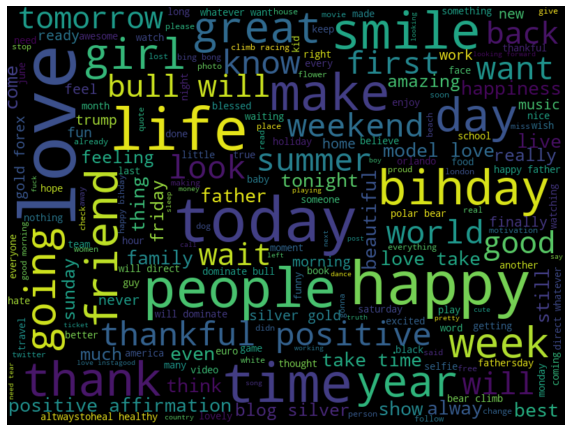

In [181]:
words = ' '.join([text for text in combined_data['clean_combined_data']])
plot_common_words(words)

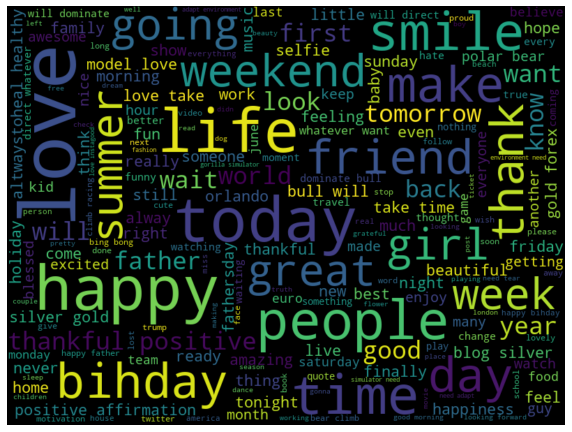

In [182]:
# Words in non racist/sexist tweets
non_racist_sexist_words = ' '.join([text for text in combined_data['clean_combined_data'][combined_data['label'] == 0]])
plot_common_words(non_racist_sexist_words)

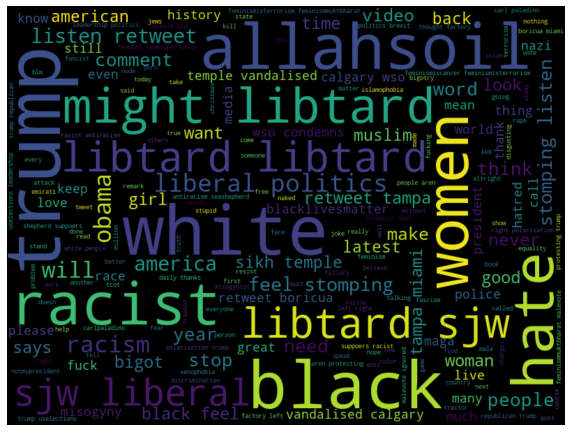

In [183]:
#  Words in racist/sexist tweets
racist_sexist_words = ' '.join([text for text in combined_data['clean_combined_data'][combined_data['label'] == 1]])
plot_common_words(racist_sexist_words)

In [184]:
# funtion to collect the hashtag
def collect_hashtag(x):
    hashtags = []
    # loop over the words in the tweet
    for i in x:
        hashtag = re.findall(r"#(\w+)", i)
        hashtags.append(hashtag)
    return hashtags

In [185]:
# collect the hashtag from non racist/sexist tweets
hashtag_regular = collect_hashtag(combined_data['clean_combined_data'][combined_data['label'] == 0])
# collect the hashtag from racist/sexist tweets
hashtag_negative = collect_hashtag(combined_data['clean_combined_data'][combined_data['label'] == 1])
# untesting list
hashtag_regular = sum(hashtag_regular, [])
hashtag_negative = sum(hashtag_negative, [])

In [186]:
# funtion to plot the top n hashtag
def plot_top_hashtag(sum_hashtag):
    dataframe = pd.DataFrame({'Hashtag': list(sum_hashtag.keys()), 'Count': list(sum_hashtag.values())})
    # select the top 15 most frequent hashtags
    dataframe = dataframe.nlargest(columns='Count', n = 15)
    plt.figure(figsize=(18,6))
    ax = sns.barplot(data = dataframe, x = "Hashtag", y = "Count")
    ax.set(ylabel = "Count")
    plt.show()

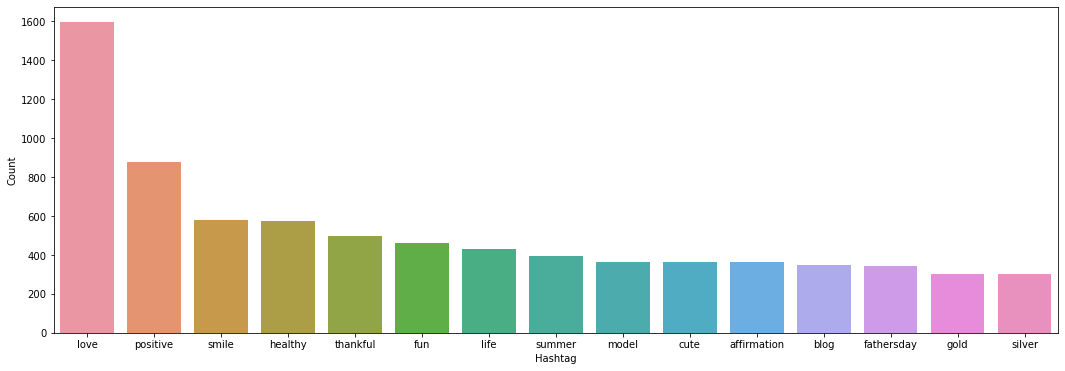

In [187]:
# plot the n top hashtags in the non-racist/sexist tweets
sum_a = nltk.FreqDist(hashtag_regular)
plot_top_hashtag(sum_a)

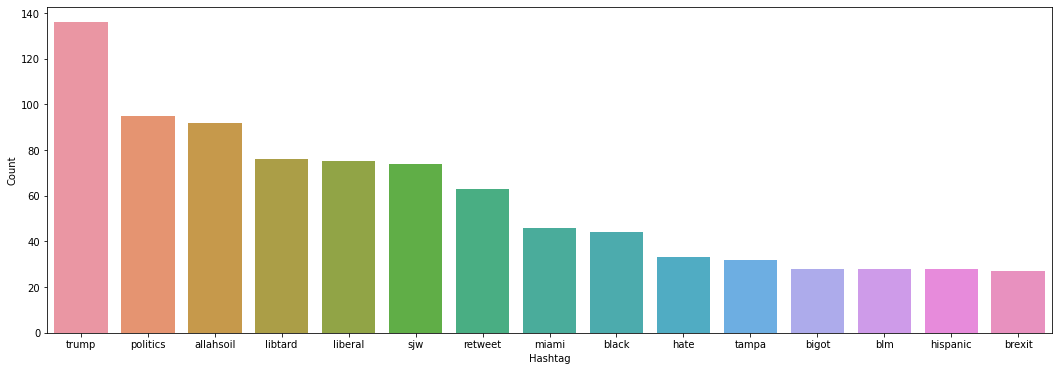

In [188]:
# plot the n top hashtags in the racist/sexist tweets
sum_b = nltk.FreqDist(hashtag_negative)
plot_top_hashtag(sum_b)

In [189]:
# Bag-of-Words Features
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combined_data['clean_combined_data'])
bow.shape

(49159, 1000)

In [190]:
#  the important terms related to TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combined_data['clean_combined_data'])
tfidf.shape

(49159, 1000)

In [191]:
# tokenizing
tokenized_tweet = combined_data['clean_combined_data'].apply(lambda x: x.split())

model_word2vector = gensim.models.Word2Vec(
    tokenized_tweet, 
    # desired no
    size=200, 
    # context window size
    window=5, 
    min_count=2, 
    # 1 for skip-gram model
    sg = 1, 
    hs=0, 
    # for negative sampling
    negative=10, 
    # no of cores
    workers=2, 
    seed=34)

In [ ]:
# train the Word2Vec model on our corpus.
model_word2vector.train(tokenized_tweet, total_examples=len(combined_data['clean_combined_data']), epochs=20)

In [113]:
# model and see how does it perform
model_word2vector.most_similar(positive='dinner')

[('lamb', 0.6112940907478333),
 ('burritos', 0.6038978695869446),
 ('spaghetti', 0.6010928153991699),
 ('desse', 0.5962057113647461),
 ('#avocado', 0.5787878632545471),
 ('#toast', 0.575272262096405),
 ('beers', 0.5674739480018616),
 ('footie', 0.5631520748138428),
 ('#warcraftmovie', 0.5594484806060791),
 ('#tacotuesday', 0.5593886375427246)]

In [114]:
model_word2vector.most_similar(positive='trump')

[('donald', 0.5577487945556641),
 ('commie', 0.5556074380874634),
 ('phony', 0.544212818145752),
 ('irrefutable', 0.5437554121017456),
 ('#delegaterevolt', 0.5436477661132812),
 ('jibes', 0.5394206047058105),
 ('chopra', 0.5385668277740479),
 ('unfavorability', 0.53751540184021),
 ('nominee', 0.5365169048309326),
 ('endorses', 0.5354727506637573)]

In [115]:
# the vector representation of any word from our corpus
model_word2vector['food']

array([ 0.3486818 ,  0.6818692 ,  0.28733417, -0.46155927,  0.8461017 ,
        0.9618998 , -0.35866946,  0.19904189, -0.03838605, -0.64853877,
        0.85098994, -0.23093848, -0.5640899 , -0.3049867 ,  0.08183115,
       -0.03241604,  1.2196332 ,  0.5725777 ,  0.41994375,  0.6512786 ,
       -0.1715226 , -0.12665002, -0.243268  ,  0.3131377 ,  0.21250136,
        0.67400974,  0.5920603 ,  0.13132747,  0.4048258 , -0.25672448,
        0.2971404 , -0.2517233 ,  0.19946441, -0.17084724,  0.16541655,
       -0.32833835, -0.2340614 ,  0.27558777,  0.42410383, -0.26868013,
       -0.6345179 ,  0.87887305, -0.31345803,  0.25895134, -0.18405525,
       -0.04053712, -0.49982202,  0.137418  ,  0.00753642, -0.1309974 ,
        0.21669462, -0.52109677, -0.46012247, -0.01837156, -0.83024406,
       -0.23390904, -0.12208359,  0.42756554,  0.27290457,  0.22122754,
        0.013076  , -0.15883578,  0.1772457 ,  0.8979207 , -0.2939119 ,
       -0.25084105, -0.5118222 ,  0.24690725,  0.17052661, -0.15

In [116]:
len(model_word2vector['food'])

200

In [117]:
# function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet
def word_vector(tokens, size):
    vector = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vector += model_word2vector[word].reshape((1,size))
            count += 1
        except KeyError: 
            continue
    if count !=0:
        vector /= count
    return vector

In [118]:
word2vec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(tokenized_tweet)):
    word2vec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    word2vec_df = pd.DataFrame(word2vec_arrays)

In [119]:
word2vec_df.shape

(49159, 200)

In [120]:
# tag each tokenised tweet with unique IDs
def add_tag(tweet):
    output = []
    for i, s in zip(tweet.index, tweet):
        output.append(LabeledSentence(s, ['tweet_' + str(i)]))
    return output

In [121]:
# tag all the tweets
tagged_tweets = add_tag(tokenized_tweet)

In [122]:
tagged_tweets[:5]

[LabeledSentence(words=['when', 'father', 'dysfunctional', 'selfish', 'drags', 'kids', 'into', 'dysfunction', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thanks', '#lyft', 'credit', 'cause', 'they', 'offer', 'wheelchair', 'vans', '#disapointed', '#getthanked'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 LabeledSentence(words=['factsguide', 'society', '#motivation'], tags=['tweet_4'])]

In [124]:
# create a doc2vec model
model_doc2vec = gensim.models.Doc2Vec(
    # for distributed memory
    dm=1,
    # for using mean of the context word vector
    dm_mean=1, 
    # derired features
    vector_size=200, 
    # width of the context window
    window=5, 
    negative=7, 
    # ignores all words with total frequence lower than 2 
    min_count=5, 
    # no of score
    workers=3, 
    # learning rate
    alpha=0.1, 
    seed=23 )

In [125]:
model_doc2vec.build_vocab([i for i in tqdm(tagged_tweets)])

100%|████████████████████████████████████████████████████████████████████████| 49159/49159 [00:00<00:00, 599531.25it/s]


In [126]:
# train the model
model_doc2vec.train(tagged_tweets, total_examples = len(combined_data['clean_combined_data']), epochs=20)

In [127]:
# Preparing word2vect Feature set
doc2vec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(combined_data)):
    doc2vec_arrays[i,:] = model_doc2vec.docvecs[i].reshape(1, 200)

In [128]:
doc2vec_df = pd.DataFrame(doc2vec_arrays)
doc2vec_df.shape

(49159, 200)

In [129]:
# Extracting train and test BoWfeatures
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

In [130]:
# split the into train and validation
x_train, x_valid, y_train, y_valid = train_test_split(train_bow, train_data['label'], random_state=42, test_size=0.3)

In [131]:
logicReg = LogisticRegression()

In [132]:
# train the model
logicReg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
prediction = logicReg.predict_proba(x_valid)
# predictingon the validation data
prediction_int = prediction[:,1] >= 0.3
# if prediction is greater than or equal to 0.3 than 1 else 0
rediction_int = prediction_int.astype(np.int)
f1_score(y_valid, prediction_int)

0.5017421602787456

In [134]:
# prediction for the test data
test_pred = logicReg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test_data['label'] = test_pred_int
submission = test_data[['id','label']]
submission.to_csv('sub_leg_bow.scv', index=False)

In [135]:
# TD-IDF Features set
train_tdidf = tfidf[:31962,:]
test_tdidf = tfidf[31962:,:]
x_train_tdidf = train_tdidf[y_train.index]
x_valid_tdidf = train_tdidf[y_valid.index]

In [136]:
logicReg.fit(x_train_tdidf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
prediction = logicReg.predict_proba(x_valid_tdidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(y_valid, prediction_int)

0.5091240875912408

In [138]:
# Word2Vec Features
train_w2v = word2vec_df.iloc[:31962,:]
test_w2v = word2vec_df.iloc[31962:,:]
x_train_w2v = train_w2v.iloc[y_train.index,:]
x_valid_w2v = train_w2v.iloc[y_valid.index,:]

In [139]:
logicReg.fit(x_train_w2v, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [140]:
prediction = logicReg.predict_proba(x_valid_w2v)
predict_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(y_valid, prediction_int)

0.5091240875912408

In [141]:
# Doc2Vec Features
train_d2v = doc2vec_df.iloc[:31962,:] 
test_d2v = doc2vec_df.iloc[31962:,:] 
x_train_d2v = train_d2v.iloc[y_train.index,:] 
xvalid_d2v = train_d2v.iloc[y_valid.index,:]

In [142]:
logicReg.fit(x_train_w2v, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
prediction = logicReg.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(y_valid, prediction_int)

0.05272727272727273

In [144]:
# bag-of-words Features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(x_train, y_train)
prediction = svc.predict_proba(x_valid)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(y_valid, prediction_int)

0.48378127896200185

In [145]:
# prediction for the test data
test_pred = svc.predict_proba(test_bow)
test_predict_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test_data['label'] = test_pred_int
submission = test_data[['id', 'label']]
submission.to_csv('sub_svm.csv', index=False)

In [146]:
# TF-IDF Features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(x_train_tdidf, y_train)
prediction = svc.predict_proba(x_valid_tdidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(y_valid, prediction_int)

0.479108635097493

In [147]:
# Word 2 Vector Features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(x_train_w2v, y_train)
prediction = svc.predict_proba(x_valid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(y_valid, prediction_int)

0.6036249014972419

In [148]:
# Doc2Vec Features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(x_train_d2v, y_train)
prediction = svc.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(y_valid, prediction_int)

0.1308641975308642

In [149]:
# Bag of WordsFeatures
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(x_train, y_train)
prediction = rf.predict(x_valid)
f1_score(y_valid, prediction)

0.5216680294358136

In [150]:
test_pred = rf.predict(test_bow)
test_data['label'] = test_pred
submission = test_data[['id', 'label']]
submission.to_csv('sub_rf_.csv', index=False)

In [151]:
# TF-IDFFeatures
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(x_train_tdidf, y_train)
prediction = rf.predict(x_valid_tdidf)
f1_score(y_valid, prediction)

0.5148698884758364

In [153]:
# Word 2 Vector Features
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(x_train_w2v, y_train)
prediction = rf.predict(x_valid_w2v)
f1_score(y_valid, prediction)

0.5111821086261981

In [156]:
# Doc 2 Vectors Features
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(x_train_d2v, y_train)
prediction = rf.predict(x_valid_d2v)
f1_score(y_valid, prediction)

NameError: name 'x_valid_d2v' is not defined

In [ ]:
xgb_model = XGBClassifier(max_depth=6, _estimators=1000).fit(x_train, y_train)
prediction = xgb_model.predict(x_valid)
f1_score(y_valid, prediction)